In [1]:
import pandas as pd
import json
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('/tmp/pycharm_project_366/config.json') as f:
    config = json.load(f)

In [18]:
def get_people_with_disease(df, all_diseased_column, disease_code_pattern):
    people_with_disease_df = df[all_diseased_column.str.contains(disease_code_pattern)]

    return people_with_disease_df

In [3]:
test_group_df = pd.read_csv(config['test_path'], low_memory=False)
test_group_df

KeyboardInterrupt: 

In [4]:
train_group_df = pd.read_csv(config['train_path'], low_memory=False)
train_group_df

,eid,34-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,1080-0.0,...,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label,31-0.0
0,1000114,1943,20.0,1.0,30.0,0.0,NaN,NaN,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"B961, C443, C446, C97, E119, E669, E780, F171,...",2,1
1,1000140,1946,60.0,7.0,60.0,3.0,60.0,7.0,2.0,0.0,...,1.28990,0.33778,0.67375,0.36829,1.20690,0.87740,0.32952,"H502, H509, I678, K20, K219, K297, M1397, M204...",0,0
2,1000179,1945,-1.0,-1.0,NaN,-1.0,NaN,NaN,4.0,0.0,...,0.92830,0.37180,0.52728,0.26773,0.88373,0.63536,0.24836,"A099, D125, I10, I849, K210, K219, K29, K514, ...",0,0
3,1000188,1942,120.0,3.0,60.0,2.0,30.0,NaN,3.0,0.0,...,0.81039,0.40859,0.54697,0.25601,0.96305,0.70071,0.26234,"C712, C719, G939, I10, R55, R568, S4220, Z515,...",0,0
4,1000290,1948,20.0,7.0,120.0,0.0,NaN,NaN,6.0,-10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"B99, D352, E119, E220, E272, E274, E559, E780,...",2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72626,6023789,1954,10.0,0.0,NaN,1.0,90.0,NaN,1.0,1.0,...,1.03760,0.38707,0.57316,0.30751,0.99229,0.74693,0.24536,"D122, F329, F419, G551, H269, J181, K219, K573...",0,0
72627,6023908,1955,30.0,2.0,60.0,1.0,90.0,NaN,0.0,5.0,...,1.18760,0.17385,0.38832,0.32677,0.74535,0.53990,0.20544,"G470, N950, R32, R413, R55, R568, R930, S001, ...",0,0
72628,6023915,1942,10.0,0.0,NaN,0.0,NaN,NaN,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A419, C61, D180, F329, H269, I252, I48, I501, ...",0,1
72629,6023953,1943,-1.0,7.0,180.0,0.0,NaN,NaN,3.0,0.0,...,0.96115,0.26585,0.48092,0.25935,0.88640,0.64831,0.23808,"C320, E780, F171, H209, H251, I10, J383, R31, ...",0,1


In [12]:
total_people_in_train = train_group_df.shape[0]
people_with_pancreatic_cancer_in_train = train_group_df[train_group_df['Label'] == '1'].shape[0]
people_with_diabetes_in_train = train_group_df[train_group_df['Label'] == '2'].shape[0]
total_people_in_test = test_group_df.shape[0]
people_with_pancreatic_cancer_in_test = test_group_df[test_group_df['Label'] == '1'].shape[0]
people_with_diabetes_in_test = test_group_df[test_group_df['Label'] == '2'].shape[0]
print(f'Total people in train: {total_people_in_train}')
print(f'Number of people with diabetes in train: {people_with_diabetes_in_train}')
print(f'Number of people with pancreatic cancer in train: {people_with_pancreatic_cancer_in_train}')
print(f'Total people in test: {total_people_in_test}')
print(f'Number of people with diabetes in test: {people_with_diabetes_in_test}')
print(f'Number of people with pancreatic cancer in test: {people_with_pancreatic_cancer_in_test}')

Total people in train: 72464
Number of people with diabetes in train: 35246
Number of people with pancreatic cancer in train: 1613
Total people in test: 100524
Number of people with diabetes in test: 8470
Number of people with pancreatic cancer in test: 391


In [10]:
train_group_df = train_group_df.drop(columns=['Unnamed: 0'])
test_group_df = test_group_df.drop(columns=['Unnamed: 0'])

In [5]:
train_group_df = train_group_df.drop(columns=['23048-0.0', '84-0.0', '23406-0.0'])

,eid,34-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,1080-0.0,...,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label,31-0.0
0,1000114,1943,20.0,1.0,30.0,0.0,NaN,NaN,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"B961, C443, C446, C97, E119, E669, E780, F171,...",2,1
1,1000140,1946,60.0,7.0,60.0,3.0,60.0,7.0,2.0,0.0,...,1.28990,0.33778,0.67375,0.36829,1.20690,0.87740,0.32952,"H502, H509, I678, K20, K219, K297, M1397, M204...",0,0
2,1000179,1945,-1.0,-1.0,NaN,-1.0,NaN,NaN,4.0,0.0,...,0.92830,0.37180,0.52728,0.26773,0.88373,0.63536,0.24836,"A099, D125, I10, I849, K210, K219, K29, K514, ...",0,0
3,1000188,1942,120.0,3.0,60.0,2.0,30.0,NaN,3.0,0.0,...,0.81039,0.40859,0.54697,0.25601,0.96305,0.70071,0.26234,"C712, C719, G939, I10, R55, R568, S4220, Z515,...",0,0
4,1000290,1948,20.0,7.0,120.0,0.0,NaN,NaN,6.0,-10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"B99, D352, E119, E220, E272, E274, E559, E780,...",2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72626,6023789,1954,10.0,0.0,NaN,1.0,90.0,NaN,1.0,1.0,...,1.03760,0.38707,0.57316,0.30751,0.99229,0.74693,0.24536,"D122, F329, F419, G551, H269, J181, K219, K573...",0,0
72627,6023908,1955,30.0,2.0,60.0,1.0,90.0,NaN,0.0,5.0,...,1.18760,0.17385,0.38832,0.32677,0.74535,0.53990,0.20544,"G470, N950, R32, R413, R55, R568, R930, S001, ...",0,0
72628,6023915,1942,10.0,0.0,NaN,0.0,NaN,NaN,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A419, C61, D180, F329, H269, I252, I48, I501, ...",0,1
72629,6023953,1943,-1.0,7.0,180.0,0.0,NaN,NaN,3.0,0.0,...,0.96115,0.26585,0.48092,0.25935,0.88640,0.64831,0.23808,"C320, E780, F171, H209, H251, I10, J383, R31, ...",0,1


In [6]:
test_group_df = test_group_df.drop(columns=['23048-0.0', '84-0.0', '23406-0.0'])

,eid,34-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,1080-0.0,...,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label,31-0.0
0,1000048,1939.0,40.0,7.0,20.0,1.0,60.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A099, A410, C504, C509, D059, D231, D649, D70,...",0,0
1,1000123,1944.0,30.0,0.0,NaN,0.0,NaN,NaN,4.0,-10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"I959, M169, R33, Z966, -1, -1, -1, -1, -1, -1,...",0,0
2,1000131,1955.0,NaN,0.0,NaN,0.0,NaN,NaN,4.0,2.0,...,1.21170,0.28261,0.47817,0.35985,0.93282,0.68476,0.24806,"G439, J22, K449, M0590, M0599, M061, M0690, M0...",0,0
3,1000219,1962.0,15.0,0.0,NaN,0.0,NaN,NaN,2.0,-10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"H269, I841, I844, I846, K011, K564, N133, N328...",0,0
4,1000238,1950.0,20.0,1.0,20.0,0.0,NaN,NaN,3.0,-10.0,...,0.92425,0.35168,0.63930,0.26301,0.99419,0.72942,0.26477,"B349, D123, D124, I211, I251, I252, K573, K579...",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100761,6023700,1958.0,30.0,2.0,10.0,1.0,-1.0,NaN,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"E876, F101, F102, F103, F106, F329, G312, I679...",0,0
100762,6023778,1950.0,60.0,1.0,20.0,0.0,NaN,NaN,3.0,1.0,...,1.08950,0.20816,0.43119,0.27740,0.76184,0.56804,0.19380,"-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1...",0,1
100763,6023994,1965.0,20.0,7.0,30.0,3.0,20.0,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"E669, I10, K219, M179, M2323, M2331, M2333, T1...",0,1
100764,6024004,1960.0,30.0,3.0,300.0,2.0,120.0,4.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"C211, C772, J352, K529, K590, K626, K628, K635...",0,1


In [11]:
train_group_df

,eid,34-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,1080-0.0,...,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label,31-0.0
0,1000114,1943,20.0,1.0,30.0,0.0,NaN,NaN,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"B961, C443, C446, C97, E119, E669, E780, F171,...",2,1
1,1000140,1946,60.0,7.0,60.0,3.0,60.0,7.0,2.0,0.0,...,1.28990,0.33778,0.67375,0.36829,1.20690,0.87740,0.32952,"H502, H509, I678, K20, K219, K297, M1397, M204...",0,0
2,1000179,1945,-1.0,-1.0,NaN,-1.0,NaN,NaN,4.0,0.0,...,0.92830,0.37180,0.52728,0.26773,0.88373,0.63536,0.24836,"A099, D125, I10, I849, K210, K219, K29, K514, ...",0,0
3,1000188,1942,120.0,3.0,60.0,2.0,30.0,NaN,3.0,0.0,...,0.81039,0.40859,0.54697,0.25601,0.96305,0.70071,0.26234,"C712, C719, G939, I10, R55, R568, S4220, Z515,...",0,0
4,1000290,1948,20.0,7.0,120.0,0.0,NaN,NaN,6.0,-10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"B99, D352, E119, E220, E272, E274, E559, E780,...",2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72626,6023789,1954,10.0,0.0,NaN,1.0,90.0,NaN,1.0,1.0,...,1.03760,0.38707,0.57316,0.30751,0.99229,0.74693,0.24536,"D122, F329, F419, G551, H269, J181, K219, K573...",0,0
72627,6023908,1955,30.0,2.0,60.0,1.0,90.0,NaN,0.0,5.0,...,1.18760,0.17385,0.38832,0.32677,0.74535,0.53990,0.20544,"G470, N950, R32, R413, R55, R568, R930, S001, ...",0,0
72628,6023915,1942,10.0,0.0,NaN,0.0,NaN,NaN,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A419, C61, D180, F329, H269, I252, I48, I501, ...",0,1
72629,6023953,1943,-1.0,7.0,180.0,0.0,NaN,NaN,3.0,0.0,...,0.96115,0.26585,0.48092,0.25935,0.88640,0.64831,0.23808,"C320, E780, F171, H209, H251, I10, J383, R31, ...",0,1


In [12]:
test_group_df

,eid,34-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,1080-0.0,...,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label,31-0.0
0,1000048,1939.0,40.0,7.0,20.0,1.0,60.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A099, A410, C504, C509, D059, D231, D649, D70,...",0,0
1,1000123,1944.0,30.0,0.0,NaN,0.0,NaN,NaN,4.0,-10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"I959, M169, R33, Z966, -1, -1, -1, -1, -1, -1,...",0,0
2,1000131,1955.0,NaN,0.0,NaN,0.0,NaN,NaN,4.0,2.0,...,1.21170,0.28261,0.47817,0.35985,0.93282,0.68476,0.24806,"G439, J22, K449, M0590, M0599, M061, M0690, M0...",0,0
3,1000219,1962.0,15.0,0.0,NaN,0.0,NaN,NaN,2.0,-10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"H269, I841, I844, I846, K011, K564, N133, N328...",0,0
4,1000238,1950.0,20.0,1.0,20.0,0.0,NaN,NaN,3.0,-10.0,...,0.92425,0.35168,0.63930,0.26301,0.99419,0.72942,0.26477,"B349, D123, D124, I211, I251, I252, K573, K579...",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100761,6023700,1958.0,30.0,2.0,10.0,1.0,-1.0,NaN,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"E876, F101, F102, F103, F106, F329, G312, I679...",0,0
100762,6023778,1950.0,60.0,1.0,20.0,0.0,NaN,NaN,3.0,1.0,...,1.08950,0.20816,0.43119,0.27740,0.76184,0.56804,0.19380,"-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1...",0,1
100763,6023994,1965.0,20.0,7.0,30.0,3.0,20.0,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"E669, I10, K219, M179, M2323, M2331, M2333, T1...",0,1
100764,6024004,1960.0,30.0,3.0,300.0,2.0,120.0,4.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"C211, C772, J352, K529, K590, K626, K628, K635...",0,1


In [13]:
train_group_df.to_csv(config['train_path'], index=False)
test_group_df.to_csv(config['test_path'], index=False)

In [5]:
feature_col = train_group_df['21001-0.0']
label_col = train_group_df['Label']

/tmp/ipykernel_1391727/1801799173.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=label_col)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

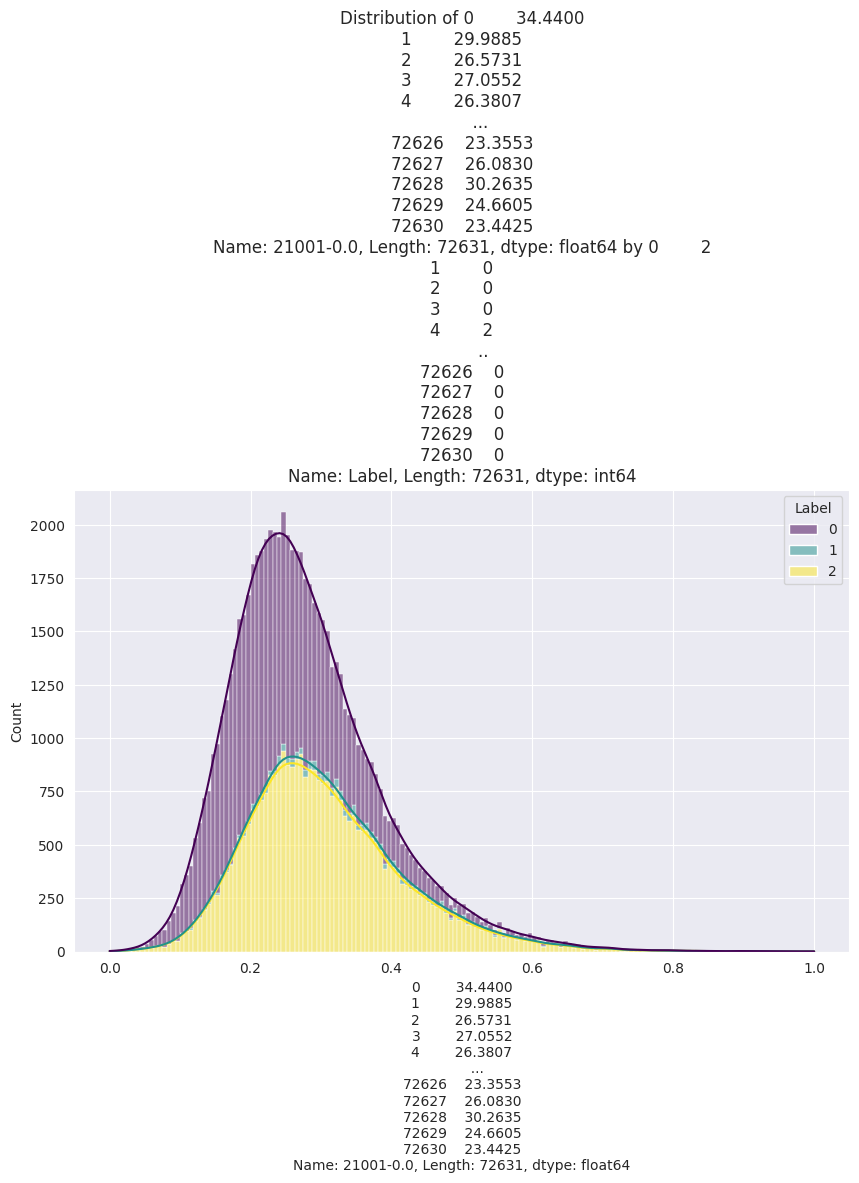

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_group_df, x='normalized', hue=label_col, multiple="stack", palette="viridis", kde=True)
plt.title(f'Distribution of {feature_col} by {label_col}')
plt.xlabel(feature_col)
plt.ylabel('Count')
plt.legend(title=label_col)
plt.show()

In [ ]:
diseases_patterns = [
    ('Diabetes', r'E11'),
    ('Pancreatic Cancer', r'C25'),
    ('Obesity', r'E66'),
    ('Acute Pancreatitis', r'K85'),
    ('Alcoholic Liver Disease', r'K70'),
    ('Cirrhosis', r'K74'),
    ('Acute Hepatitis A', r'B15'),
    ('Acute Hepatitis B', r'B16'),
    ('Acute Hepatitis C', r'B171'),
    ('Toxic Liver Disease', r'K71'),
    ('Cushings Syndrome', r'E24'),
    ('Hyperthyroidism', r'E05'),
    ('Intestinal Malabsorption', r'K90'),
    ('Arterial Embolism and Thrombosis', r'I74')
]

patient_diseases = train_df['Diagnoses']
for disease, disease_pattern in diseases_patterns[2:]:
    train_df[f'Has {disease}'] = classify_disease(patient_diseases, disease_pattern)

train_df = train_df.drop(columns=['Diagnoses'])
train_df = train_df.drop(columns=[f'Diagnoses - ICD10 - {i}' for i in range(100)])

father_diagnosis_codes = [f'Illnesses of father - {i}' for i in range(10)]
mother_diagnosis_codes = [f'Illnesses of mother - {i}' for i in range(11)]
siblings_diagnosis_codes = [f'Illnesses of siblings - {i}' for i in range(12)]

father_diseases = train_df[father_diagnosis_codes].astype(str).agg(', '.join, axis=1)
mother_diseases = train_df[mother_diagnosis_codes].astype(str).agg(', '.join, axis=1)
siblings_diseases = train_df[siblings_diagnosis_codes].astype(str).agg(', '.join, axis=1)

for disease, disease_pattern in diseases_patterns:
    train_df[f'Father has {disease}'] = classify_disease(father_diseases, disease_pattern)
for disease, disease_pattern in diseases_patterns:
    train_df[f'Mother has {disease}'] = classify_disease(mother_diseases, disease_pattern)
for disease, disease_pattern in diseases_patterns:
    train_df[f'Siblings have {disease}'] = classify_disease(siblings_diseases, disease_pattern)

train_df = train_df.drop(columns=(father_diagnosis_codes + mother_diagnosis_codes + siblings_diagnosis_codes))